#  Relaxation Time - Permeability -- Dependecy Analysis

```{figure} BCC.png
---
scale: 50%
align: right
---
Periodic body-centered cubic (BCC): a) 3D image b) 2D projection.
```

In the present analysis, we aim to observe the relationship between the relaxation time of the collision model ($\tau$) and the intrinsic permeability ($k). It should be noted that this relationship is directly influenced by the collision model and the boundary conditions employed in the model. The problem of creeping flow over a periodic body-centered cubic (BCC) is explored in orde to compare the present results with Pan et al. (2006). The permeabilidade of a periodic array spheres is given by

$k^{*}=\displaystyle\frac{1}{6\pi a d^{*}}$

where $a$ is the sphere radius and $d^{*}$ is dimensionless drag force represented by

$d^{*}=\displaystyle\frac{6\pi a \rho \nu }{F_{D}}$

being $\rho$ the fluid density, $\nu$ the kinematic viscosity, $F_{D}$ the drag force. The dimensioless drag force can be also determined by the geometric propertie of solid volume fraction $c$ as a expansion function given by

$d^{*}=\displaystyle\sum_{n=0}^{30}\alpha_{n}\chi^{n}, \quad\quad \chi=\left(\displaystyle\frac{c}{c_{max}}\right)^{1/3}, \quad\quad c=\displaystyle\frac{8\pi a^{3}}{3L^{3}}, \quad\quad c_{\max}=\displaystyle\frac{\sqrt{3}\pi}{8},$

where $L$ is the length of the cube, $\chi$ the relation between the solid volume and maximum solid volume and $\alpha_{n}$ the coefficients obtained by Sangani and Acrivos (1982)(https://doi.org/10.1016/0301-9322(82)90047-7).

In [59]:
qs = np.array([1.0,1.575834,2.483254,3.233022,4.022864,4.650320,5.281412,5.826374,6.258376,6.544504,6.878396,
               7.190839,7.268068,7.304025,7.301217,7.2364410,7.298014,7.369847,7.109497,6.228418,5.235796,
              4.476874,3.541982,2.939353,3.935484])
a=11.778
#phi=0.85
xi=( (64.0*a**(3))/(sqrt(3.0)*3.0*(32.0)**(3.0)) )**(1./3.)
d=0.0
for i in range (0,len(qs)):
    d=d+qs[i]*xi**(i)
#d=qs[0]*xi**(0)+qs[1]*xi**(1)+qs[2]*xi**(2)+qs[3]*xi**(3)+qs[4]*xi**(4)+qs[5]*xi**(5)+qs[6]*xi**(6)+qs[7]*xi**(7)
k=1.0/(d*6.0*pi*a)
print("d=",d)
print("K=",k)
print("xi=",xi)
print("K=",2.7948/32**2)

d= 25.492729708804468
K= 0.0001766895992112725
xi= 0.8500039338144266
K= 0.002729296875


Populating the interactive namespace from numpy and matplotlib


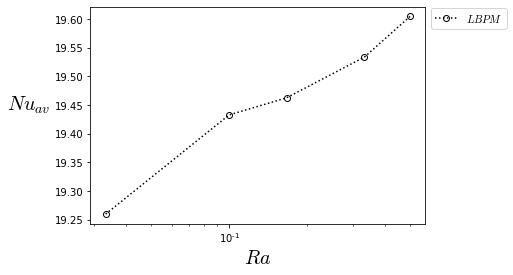

In [4]:
%pylab inline
matplotlib.rcParams['mathtext.fontset'] = 'cm'
#k = np.array([19.6044, 19.5336, 19.4626, 19.4328, 19.26])
k = np.array([2.7948, 19.5336, 19.4626, 19.4328, 19.26])
nu = np.array([1./2., 1./3., 1./6., 1./10., 1./30.])
plt.semilogx(nu,k,'ko:',fillstyle='none')
plt.ylabel('$Nu_{av}$', color='k', horizontalalignment='right',rotation=0, fontsize=20)
plt.xlabel('$Ra$', fontsize=20)
plt.legend(['$LBPM$'],fontsize=11.,bbox_to_anchor=(1.0, 1.02))
plt.show()

<h3 style="font-size:12px;text-align: center">Table -Permeability comparison with Michels et al. (2021).</h3>

$$
\begin{aligned}[]
\begin{array}{cccc}
\hline
\textrm{Model} & k[Darcy]  & \tau & Variance[\%]  \\ \hline
\textrm{LV60A Sandpack}  & 38.84  &    1.0    &     -    \\ 
                         & 38.26  &   0.9     &    1.51  \\
                         & 37.69  &   0.8     &    1.51 \\ \hline
\end{array}
\end{aligned}
$$